**Import the libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Load the dataset**

In [2]:
data=pd.read_csv("revenue_prediction.csv")

In [3]:
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


**Examining missing values in a dataset**

In [4]:
data.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

**Drop irrelevant columns**

<ipython-input-5-66ee856e1ae3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


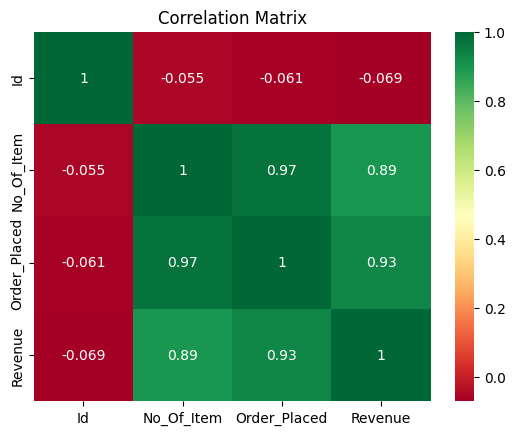

In [5]:
# To determine which independent variables to select for revenue prediction analysis, we can use statistical techniques such as correlation analysis
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Define a list of irrelevant column names
irrelevant_columns = ['Id', 'No_Of_Item', 'Name', 'Franchise', 'Category', 'City']

# Drop the irrelevant columns
data = data.drop(irrelevant_columns, axis = 1)

In [7]:
data.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


In [9]:
data.shape

(100, 2)

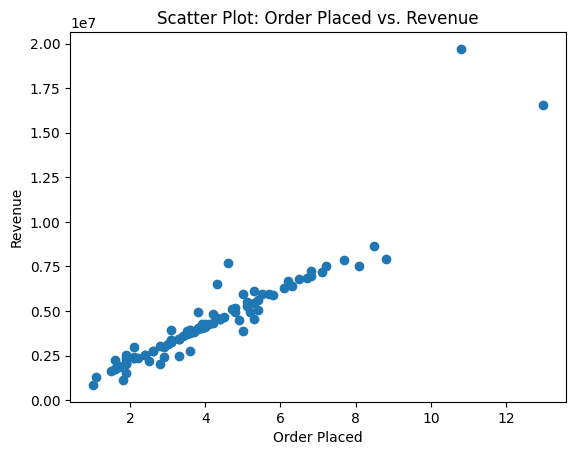

In [10]:
# Scatter plot
plt.scatter(data['Order_Placed'], data['Revenue'])

# Set labels and title
plt.xlabel('Order Placed')
plt.ylabel('Revenue')
plt.title('Scatter Plot: Order Placed vs. Revenue')

# Display the plot
plt.show()


The graph proves that as the number of order increase, there is an increase in Revenue.

# Linear Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
X = data.iloc[:, 0].values.reshape(-1, 1)  
y = data.iloc[:, 1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE) to evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 432167.2974177859


Text(0, 0.5, 'Revenue')

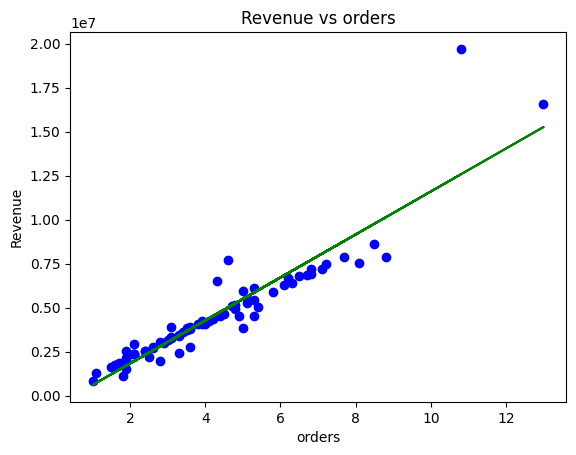

In [21]:
# Visualising the Training set results

plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, model.predict(X_train), color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")



Text(0, 0.5, 'Revenue')

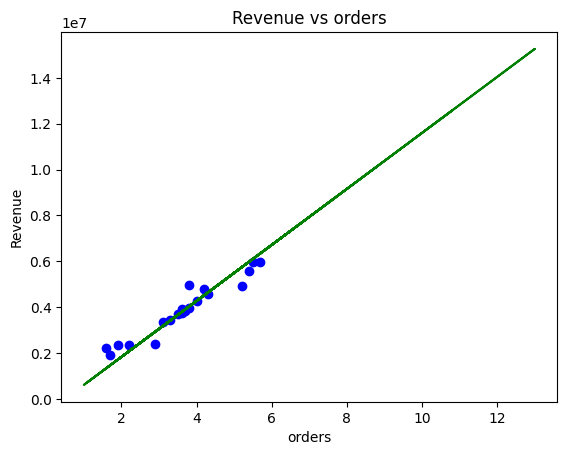

In [24]:
# Visualising the Test set results

plt.scatter(X_test, y_test, color="blue")
plt.plot(X_train, model.predict(X_train), color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")

In [25]:
# Check the accuracy of the model

from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

0.9109612329066813

A score of 0.9109612329066813 indicates the coefficient of determination (R-squared) for the model. R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, the model explains approximately 91.1% of the variance in the dependent variable.